L1 and L2 Regularization

 Regression model that uses the L1 regularization technique is called lasso regression, and a model that uses the L2 is called ridge regression

Regularization in Python, which helps to mitigate the problem of overfitting. Regularization introduces a penalty for more complex models, effectively reducing their complexity and encouraging the model to learn more generalized patterns. This method strikes a balance between underfitting and overfitting, where underfitting occurs when the model is too simple to capture the underlying trends in the data, leading to both training and validation accuracy being low.

L1 vs. L2 Regularization Methods
L1 Regularization: Also called a lasso regression, adds the absolute value of the sum (“absolute value of magnitude”) of coefficients as a penalty term to the loss function.
L2 Regularization: Also called a ridge regression, adds the squared sum (“squared magnitude”) of coefficients as the penalty term to the loss function.

Both L1 and L2 regularization add a penalty term to the loss function in a machine learning model. This puts weight on certain values to discourage the model from fitting training data too closely, and to reduce overall model complexity. 

L1 regularization, or lasso (“least absolute shrinkage and selection operator”) regression, is a regularization method that penalizes high-value coefficients in a machine learning model. L1’s penalty term is the absolute value of the sum of coefficients (or the “absolute value of magnitude” of the coefficient), and is added to the model’s sum of squared errors (SSE) loss function. 

Both penalty terms for L1 and L2 regularization are controlled by the model hyperparameter lambda (λ), which determines the tradeoffs between bias and variance in coefficients.



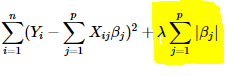

penalize the model by either its absolute weight (L1), or the square of its weight (L2). This begs the questions: So which one should I choose? and why does Lasso perform feature selection?

import tensorflow as tf 
print(tf.config.list_physical_devices('GPU'))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 67s 0us/step


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 - 22s - 14ms/step - accuracy: 0.4174 - loss: 1.6046 - val_accuracy: 0.5348 - val_loss: 1.3289
Epoch 2/10
1563/1563 - 19s - 12ms/step - accuracy: 0.5390 - loss: 1.2876 - val_accuracy: 0.6252 - val_loss: 1.0811
Epoch 3/10
1563/1563 - 19s - 12ms/step - accuracy: 0.5934 - loss: 1.1502 - val_accuracy: 0.6660 - val_loss: 0.9606
Epoch 4/10
1563/1563 - 20s - 13ms/step - accuracy: 0.6241 - loss: 1.0696 - val_accuracy: 0.6797 - val_loss: 0.9121
Epoch 5/10
1563/1563 - 19s - 12ms/step - accuracy: 0.6470 - loss: 0.9985 - val_accuracy: 0.6667 - val_loss: 0.9480
Epoch 6/10
1563/1563 - 19s - 12ms/step - accuracy: 0.6616 - loss: 0.9552 - val_accuracy: 0.6979 - val_loss: 0.8803
Epoch 7/10
1563/1563 - 19s - 12ms/step - accuracy: 0.6839 - loss: 0.8954 - val_accuracy: 0.7137 - val_loss: 0.8259
Epoch 8/10
1563/1563 - 19s - 12ms/step - accuracy: 0.6968 - loss: 0.8577 - val_accuracy: 0.7129 - val_loss: 0.8272
Epoch 9/10
1563/1563 - 19s - 12ms/step - accuracy: 0.7111 - loss: 0.8173 - val_a

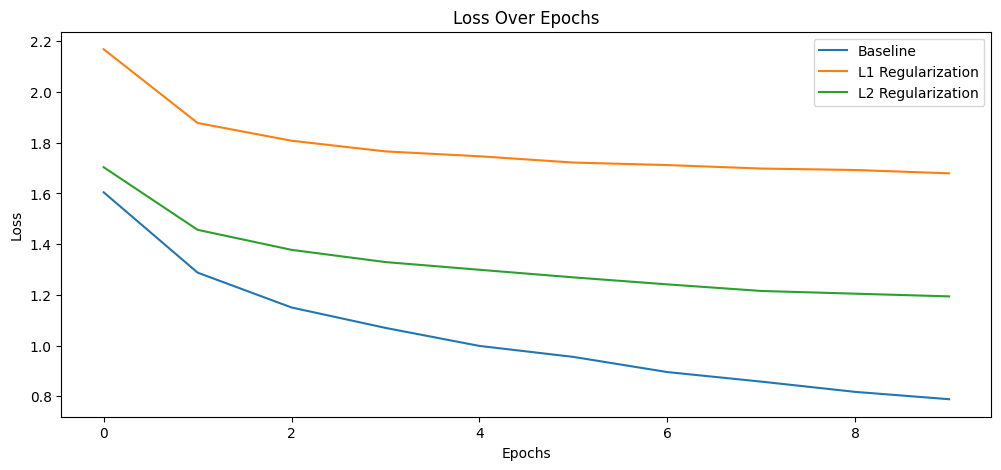

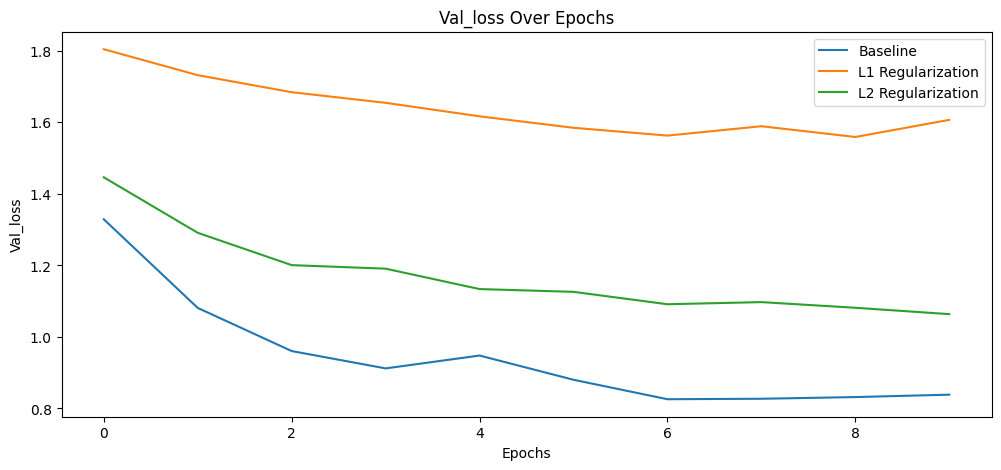

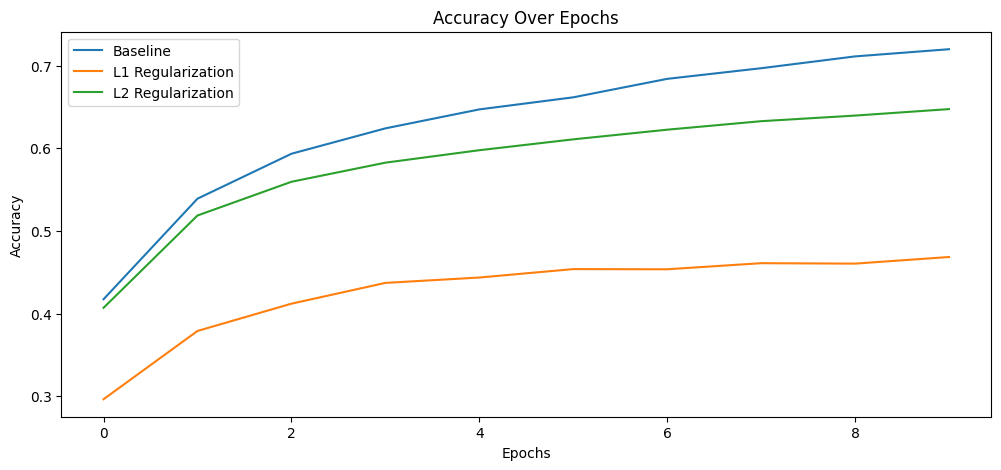

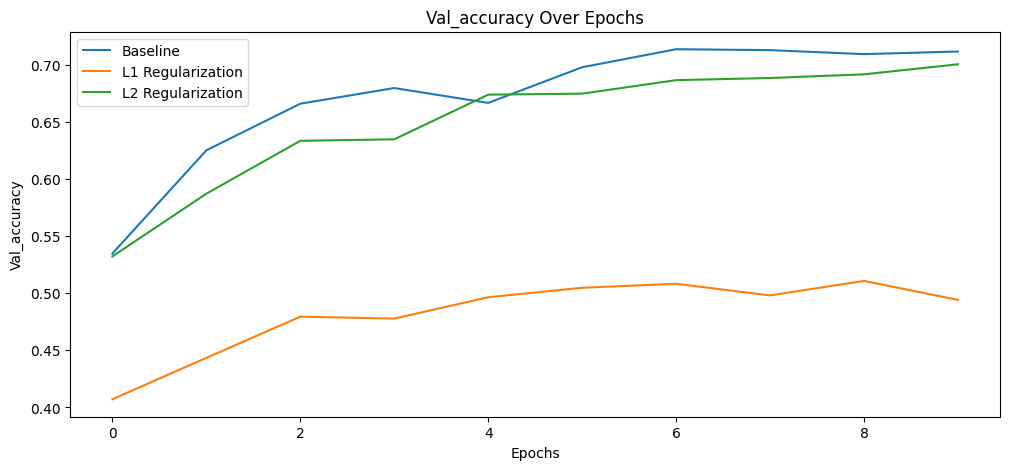

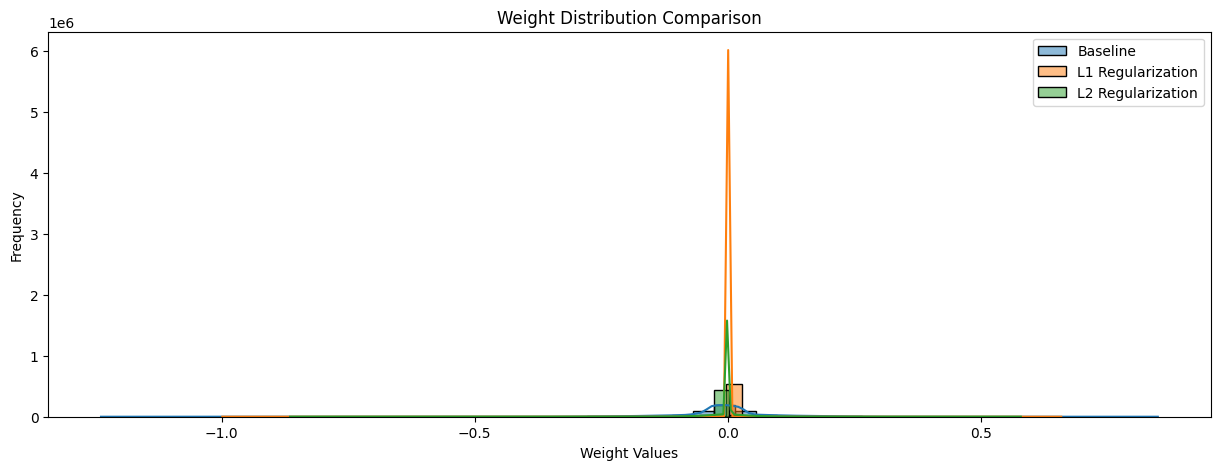

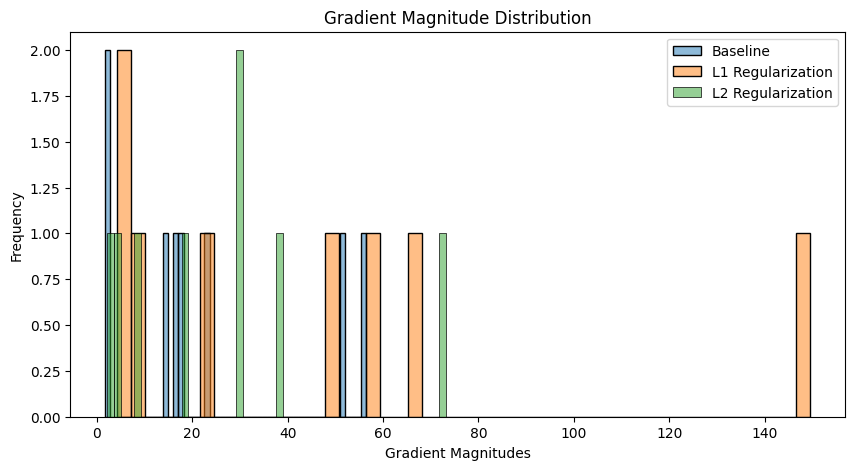

AttributeError: The layer sequential has never been called and thus has no defined input.

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values (0 to 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to Create CNN Model
def create_cnn_model(regularizer=None):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=regularizer, input_shape=(32,32,3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=regularizer),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=regularizer),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Baseline Model (No Regularization)
baseline_model = create_cnn_model()
baseline_history = baseline_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

# Train L1 Regularized Model
l1_model = create_cnn_model(l1(0.0005))
l1_history = l1_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

# Train L2 Regularized Model
l2_model = create_cnn_model(l2(0.0005))
l2_history = l2_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

# Function to Plot Training vs Validation Loss & Accuracy
def plot_metric(histories, metric):
    plt.figure(figsize=(12,5))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=name)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.title(f"{metric.capitalize()} Over Epochs")
    plt.legend()
    plt.show()

# Compare Training Loss and Accuracy
histories = {
    "Baseline": baseline_history,
    "L1 Regularization": l1_history,
    "L2 Regularization": l2_history
}

plot_metric(histories, "loss")  # Training Loss
plot_metric(histories, "val_loss")  # Validation Loss
plot_metric(histories, "accuracy")  # Training Accuracy
plot_metric(histories, "val_accuracy")  # Validation Accuracy

# Extract and Compare Weight Distributions
def plot_weight_distribution(models, titles):
    plt.figure(figsize=(15,5))
    for model, title in zip(models, titles):
        weights = np.concatenate([w.flatten() for w in model.get_weights()])
        sns.histplot(weights, bins=50, kde=True, label=title)
    plt.xlabel("Weight Values")
    plt.ylabel("Frequency")
    plt.title("Weight Distribution Comparison")
    plt.legend()
    plt.show()

plot_weight_distribution(
    [baseline_model, l1_model, l2_model],
    ["Baseline", "L1 Regularization", "L2 Regularization"]
)

# Compute Gradient Magnitudes
def compute_gradient_magnitudes(model, x_sample, y_sample):
    with tf.GradientTape() as tape:
        predictions = model(x_sample)
        loss = tf.keras.losses.categorical_crossentropy(y_sample, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    return np.concatenate([tf.norm(g).numpy().flatten() for g in gradients])

x_sample, y_sample = x_train[:32], y_train[:32]  # Small batch for gradient analysis
grad_baseline = compute_gradient_magnitudes(baseline_model, x_sample, y_sample)
grad_l1 = compute_gradient_magnitudes(l1_model, x_sample, y_sample)
grad_l2 = compute_gradient_magnitudes(l2_model, x_sample, y_sample)

# Plot Gradient Magnitude Distribution
plt.figure(figsize=(10,5))
sns.histplot(grad_baseline, bins=50, alpha=0.5, label="Baseline")
sns.histplot(grad_l1, bins=50, alpha=0.5, label="L1 Regularization")
sns.histplot(grad_l2, bins=50, alpha=0.5, label="L2 Regularization")
plt.xlabel("Gradient Magnitudes")
plt.ylabel("Frequency")
plt.title("Gradient Magnitude Distribution")
plt.legend()
plt.show()

# Visualizing Feature Activation Maps (First Conv Layer)
def plot_feature_maps(model, x_sample):
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    activations = activation_model.predict(x_sample[np.newaxis, ...])
    
    fig, axes = plt.subplots(1, len(activations), figsize=(15, 5))
    for i, activation in enumerate(activations):
        axes[i].imshow(np.mean(activation[0], axis=-1), cmap="viridis")
        axes[i].axis("off")
        axes[i].set_title(f"Layer {i+1}")
    plt.suptitle("Feature Activation Maps")
    plt.show()

x_sample = x_test[0]  # Take one test image
plot_feature_maps(baseline_model, x_sample)
plot_feature_maps(l1_model, x_sample)
plot_feature_maps(l2_model, x_sample)


In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0
